In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.DataFrame({
    "x1": np.random.randint(6,10,(100,)),
    "x2": np.random.random((100,))
})
data

,x1,x2
0,7,0.991094
1,6,0.613184
2,8,0.117962
3,8,0.229633
4,8,0.373977
...,...,...
95,6,0.766142
96,6,0.149860
97,8,0.913779
98,7,0.835400


In [29]:
x1 = data.groupby("x1",).size()
x1

x1
6    15
7    33
8    33
9    19
dtype: int64

In [164]:
def freq_bar(x, **plt_args):
    x = x.value_counts()
    return plt.bar(x.index.values, x.values, **plt_args)

<BarContainer object of 4 artists>

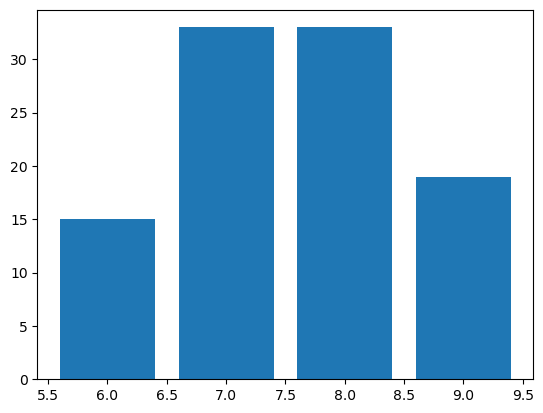

In [165]:
freq_bar(data["x1"])

In [166]:
def range_labels(start, end, size, decimals=None):
    step = 1 / size
    values = np.linspace(start,end,size+1)
    return [f"{i1:.2}-{i2:.2}" for i1,i2 in zip(values[:-1],values[1:])]

In [177]:
def freq_bar_ranges(x, size, **plt_args):
    step = 1/size
    bins = np.arange(0,1+step,step)
    x_bins = pd.DataFrame()
    x_bins["bin"] = np.digitize(x, bins)
    x_bins["value"] = x
    x_counts = x_bins.groupby("bin").size()
    bars = plt.bar(x_counts.index, x_counts, **plt_args)
    plt.xticks(ticks=range(1,size+1), labels=range_labels(x.min(),x.max(),size))
    return bars

<BarContainer object of 5 artists>

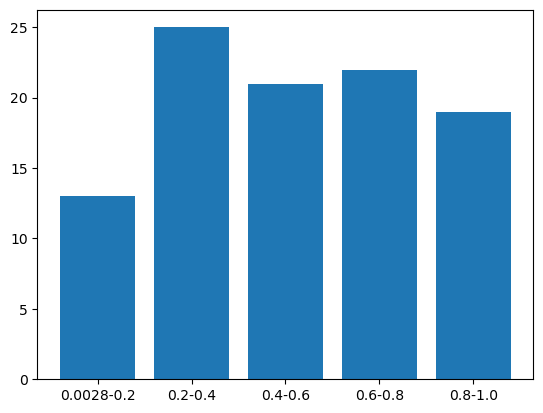

In [178]:
freq_bar_ranges(data["x2"], 5)